# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

In [369]:
!pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\jonat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Inicialización

In [370]:
# Cargar todas las librerías
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np






## Cargar datos

In [371]:

# Carga los archivos de datos en diferentes DataFrames
t2 = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_5\megaline_calls.csv")
t4 = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_5\megaline_internet.csv")
t3 = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_5\megaline_messages.csv")
t5 = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_5\megaline_plans.csv")
t1 = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_5\megaline_users.csv")


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [372]:
print(t1.dtypes)
print()
print(t2.dtypes)
print()
print(t3.dtypes)
print()
print(t4.dtypes)
print()
print(t5.dtypes)

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

id              object
user_id          int64
message_date    object
dtype: object

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


## Tarifas

In [373]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
t5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [374]:
# Imprime una muestra de los datos para las tarifas
print(t5.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los datos son correctos, las tarifas son correctas, tarifas de cobro por excedentes.
Observaciones: El plan maneja GB por lo las multiplicaciones de conversion a mb son correctas tomando en cunta 1024
No hay Valores ausentes y es una tabla de informacion detallada sobre los planes surf y ultimate que maneja la compañia

### Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

No veo conveniente modificar datos, sin embargo creo conveniente el poder reordenar el numero de columnas es decir que el nombre del plan se muestre primero

In [375]:

columnas = [t5.columns[-1]] + list(t5.columns[:-1])
t5 = t5[columnas]
print(t5)


  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                  15360               500   
1  ultimate               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
0               20          10             0.03            0.03  
1               70           7             0.01            0.01  


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

No veo conveniente modificar datos, sin embargo creo conveniente transformar los mb_per_month_included a GB es decir dividir todo entre 1024 para visualizar en enteros

In [376]:

mb_a_gb = []
for datos in t5['mb_per_month_included']:
    mb_a_gb.append(datos/1024)
t5['mb_per_month_included'] = mb_a_gb
print(t5)


  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                   15.0               500   
1  ultimate               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
0               20          10             0.03            0.03  
1               70           7             0.01            0.01  


## Usuarios

In [377]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [378]:
# Imprime una muestra de datos para usuarios
print(t1.sample(n=5))

print(t1['user_id'].unique())

print(t1['churn_date'].dropna())

     user_id first_name  last_name  age  \
448     1448     Elayne      Foley   33   
174     1174     Larisa      Ellis   67   
472     1472     Maximo    Mendoza   51   
28      1028   Jefferey  Rasmussen   57   
456     1456    Seymour      Olsen   66   

                                                city    reg_date      plan  \
448                           Urban Honolulu, HI MSA  2018-10-17      surf   
174                         Cleveland-Elyria, OH MSA  2018-01-28      surf   
472           San Francisco-Oakland-Berkeley, CA MSA  2018-04-10      surf   
28   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  2018-02-21  ultimate   
456      Minneapolis-St. Paul-Bloomington, MN-WI MSA  2018-06-02  ultimate   

    churn_date  
448        NaN  
174        NaN  
472        NaN  
28         NaN  
456        NaN  
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 10

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Hay datos ausentes en la columna churn_date, lo que quiere decir que la tarifa se estaba usando cuando fue extraida esta base de datos, por otro lado, debemos reemplazarlos y contarlos para poder manipularlos a nuestro favor.
Debemos revisar igual el formato de fecha que tenemos en la columna reg_date, para poder homologar el mismo formato para todas las fechas

Esta tabla no cuenta con valores duplicados, es decir todos los usuarios son unicos, ya que la muestra va de 1000 a 1499 y son 500 usuasrios en la muestra

### Corregir los datos

In [379]:
print(t1['reg_date'].sample(n=5))

61     2018-03-08
263    2018-03-06
254    2018-08-03
148    2018-11-04
233    2018-09-11
Name: reg_date, dtype: object


El formato de las fechas esta correcto, es decir aaaa-mm-dd, sin embargo como estamos trabajando unicamente con el año 2018, no importan los dias ya que el analisis es por mes, entonces unicamente las fechas las convertiremos a mes 


In [380]:
print(t1['churn_date'].isna().sum())

466


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [381]:
t1['churn_date'] = t1['churn_date'].fillna(0)
print(t1[t1['churn_date'] != 0]['churn_date'])

6      2018-12-18
12     2018-11-16
22     2018-09-07
40     2018-12-30
50     2018-10-07
54     2018-12-31
67     2018-11-24
83     2018-12-18
84     2018-11-11
94     2018-12-12
106    2018-11-14
129    2018-12-27
172    2018-11-29
180    2018-12-22
186    2018-12-31
191    2018-11-30
220    2018-10-13
246    2018-07-31
269    2018-12-15
281    2018-11-14
296    2018-12-18
298    2018-12-19
300    2018-12-19
315    2018-10-03
358    2018-10-22
363    2018-08-16
402    2018-12-26
414    2018-09-01
416    2018-11-21
441    2018-08-19
451    2018-12-10
466    2018-09-17
467    2018-11-18
491    2018-09-18
Name: churn_date, dtype: object


## Llamadas

In [382]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(t2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [383]:
# Imprime una muestra de datos para las llamadas
print(t2.sample(n=5))

              id  user_id   call_date  duration
97637   1348_383     1348  2018-10-27      3.91
114079  1400_427     1400  2018-08-03     11.02
125037  1440_553     1440  2018-12-07      4.15
131446  1472_451     1472  2018-07-06      0.50
71108   1252_602     1252  2018-06-14      5.74


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Aqui nos conviene rendondear arriba los minutos ya que la empresa cobra por minutos cerrados es decir por minutos comenzados, enteros no fraccionarios.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [384]:
nueva_duration = []

for dato in t2['duration']:
    dato = round(dato)
    nueva_duration.append(dato)

t2['duration']=nueva_duration

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [385]:
print(t2['duration'].sample(n=10))

21481      5
108031     0
87755      3
110140     8
4773      11
36137     16
73524     13
156       16
72643      4
137532    13
Name: duration, dtype: int64


## Mensajes

In [386]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(t3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [387]:
# Imprime una muestra de datos para los mensajes
print(t3.sample(n=5))

             id  user_id message_date
19951  1126_893     1126   2018-08-29
63955   1408_80     1408   2018-03-09
39564  1257_117     1257   2018-12-01
49584  1328_542     1328   2018-08-07
133    1001_258     1001   2018-12-01


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

No veo conveniente modificar datos

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

No veo conveniente modificar datos

## Internet

In [388]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(t4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [389]:
# Imprime una muestra de datos para el tráfico de internet
print(t4.sample(n=5))

             id  user_id session_date  mb_used
23773   1110_31     1110   2018-08-10   590.31
39942   1181_10     1181   2018-07-21  1145.38
83258  1389_144     1389   2018-09-28   419.81
20113  1090_352     1090   2018-12-17   882.64
87864  1406_181     1406   2018-07-23   618.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Aqui nos conviene redondear todos los valores de mb_used, para poder en un futuro dividirlos entre 1024 o en su caso ver los multiplos enteros para poder realizar y analizar el cobro de la tarifa

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [390]:
new_mb_used = []

for datos in t4['mb_used']:
    datos = round(datos)
    new_mb_used.append(datos)

t4['mb_used']=new_mb_used

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [391]:
print(t4['mb_used'].sample(n=5))

101068      0
38232     300
15629     137
9084      364
90575     433
Name: mb_used, dtype: int64


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [392]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(t5)


  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                   15.0               500   
1  ultimate               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
0               20          10             0.03            0.03  
1               70           7             0.01            0.01  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [393]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# tabla de llamadas(t2) contiene 137735 registros de llamadas

Datos_por_usuario = []


#converti las fechas a una nueva columna que solo me tenga los meses del año 2018
t2['call_date'] = pd.to_datetime(t2['call_date'])
meses = []
for fecha in t2['call_date']:
    meses.append(fecha.month)
t2['mes'] = meses

#Ahora vamos a sumar las llamadas totales por mes por cada usuario unico del dataset
llamadas_por_usuario_mes = t2.groupby(['user_id', 'mes'])['id'].count().reset_index()
llamadas_por_usuario_mes = llamadas_por_usuario_mes.rename(columns={'id': 'total_llamadas'})
print(llamadas_por_usuario_mes.head())

   user_id  mes  total_llamadas
0     1000   12              16
1     1001    8              27
2     1001    9              49
3     1001   10              65
4     1001   11              64


In [394]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# tabla de llamadas(t2) contiene 137735 registros de llamadas
#Ahora vamos a sumar los minutos totales por mes por cada usuario unico del dataset
minutos_por_usuario_mes = t2.groupby(['user_id', 'mes'])['duration'].sum().reset_index()
minutos_por_usuario_mes = minutos_por_usuario_mes.rename(columns={'duration': 'total_minutos'})
print(minutos_por_usuario_mes.head())

   user_id  mes  total_minutos
0     1000   12            117
1     1001    8            173
2     1001    9            297
3     1001   10            374
4     1001   11            404


In [395]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# tabla de mensajes(t3) contiene 76051 registros de mensajes
#converti las fechas a una nueva columna que solo me tenga los meses del año 2018
t3['message_date'] = pd.to_datetime(t3['message_date'])
meses=[]
for fechas in t3['message_date']:
    meses.append(fecha.month)
t3['mes'] = meses

#Ahora vamos a sumar las llamadas totales por mes por cada usuario unico del dataset
mensajes_por_usuario_mes = t3.groupby(['user_id', 'mes'])['id'].count().reset_index()
mensajes_por_usuario_mes = mensajes_por_usuario_mes.rename(columns={'id': 'total_mensajes'})
print(mensajes_por_usuario_mes.head())

   user_id  mes  total_mensajes
0     1000   12              11
1     1001   12             207
2     1002   12              88
3     1003   12              50
4     1004   12             177


In [396]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# tabla de internat(t4) contiene 104825 registros de sesiones WEB
#convertir las fechas a una nueva columna que solo me tenga los meses del año 2018
t4['session_date'] = pd.to_datetime(t4['session_date'])
meses=[]
for fechas in t4['session_date']:
    meses.append(fechas.month)
t4['mes'] = meses

#Ahora vamos a sumar el volumen de datos totales por mes por cada usuario unico del dataset
mb_por_usuario_mes = t4.groupby(['user_id', 'mes'])['id'].count().reset_index()
mb_por_usuario_mes = mb_por_usuario_mes.rename(columns={'id': 'total_megabytes'})
print(mb_por_usuario_mes.head())

   user_id  mes  total_megabytes
0     1000   12                5
1     1001    8               25
2     1001    9               53
3     1001   10               56
4     1001   11               51


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [397]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
datos_combinados = pd.merge(llamadas_por_usuario_mes,
                            mensajes_por_usuario_mes,
                            on=['user_id','mes'], how='left').merge(minutos_por_usuario_mes,
                             on=['user_id','mes'], how='left').merge(mb_por_usuario_mes,on=['user_id','mes'],how='left')

Datos_por_usuario.append(datos_combinados)
print(Datos_por_usuario[0].head())

   user_id  mes  total_llamadas  total_mensajes  total_minutos  \
0     1000   12              16            11.0            117   
1     1001    8              27             NaN            173   
2     1001    9              49             NaN            297   
3     1001   10              65             NaN            374   
4     1001   11              64             NaN            404   

   total_megabytes  
0              5.0  
1             25.0  
2             53.0  
3             56.0  
4             51.0  


In [398]:
# Añade la información de la tarifa
Datos_nuevos_por_ususario = []
Datos_nuevos_por_ususario = pd.concat(Datos_por_usuario,ignore_index=True)
Datos_nuevos_por_ususario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2258 non-null   int64  
 1   mes              2258 non-null   int64  
 2   total_llamadas   2258 non-null   int64  
 3   total_mensajes   376 non-null    float64
 4   total_minutos    2258 non-null   int64  
 5   total_megabytes  2243 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 106.0 KB


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [399]:
# Calcula el ingreso mensual para cada usuario

#Ordenamos datos por ususaerio unico, es decir solo tenemos 500 usuarios y lo validamos
#Tenemos en cuenta que las tarifas son mensuales,e s decir se cobra por mes
df_sum = Datos_nuevos_por_ususario.groupby(["user_id","mes"], as_index=False).sum(numeric_only=True)

df_sum


,user_id,mes,total_llamadas,total_mensajes,total_minutos,total_megabytes
0,1000,12,16,11.0,117,5.0
1,1001,8,27,0.0,173,25.0
2,1001,9,49,0.0,297,53.0
3,1001,10,65,0.0,374,56.0
4,1001,11,64,0.0,404,51.0
...,...,...,...,...,...,...
2253,1498,12,39,0.0,326,65.0
2254,1499,9,41,0.0,328,45.0
2255,1499,10,53,0.0,361,61.0
2256,1499,11,45,0.0,287,49.0


Como vamos a identificar las tarifas por ususario es decir lo que cada usuario pago al mes por un plan celular:

Ultimate: es tarifa ultimate solo si total de minutos es mayor a 500 pero menor o igual a 3000, o si total mensajes es mayor a 50 pero menor o igual a 1000, o si total megabytes es mayor a 15360 pero menor o igual a 30720

Surf: es tarifa surf si total minutos es menor o igual a 500, o si total mensjaes es menor o igual a 50 o si total megabytes es menor o igual a 30720

In [400]:
# Inicializamos columna como OTRO para cubrir casos fuera de surf/ultimate
df_sum["tarifa"] = "otro"

#SURF
cond_surf = (
    (df_sum["total_minutos"] <= 500) |
    (df_sum["total_mensajes"] <= 50) |
    (df_sum["total_megabytes"] <= 15360)
)

df_sum.loc[cond_surf, "tarifa"] = "surf"

#ULTIMATE
cond_ultimate = (
    ((df_sum["total_minutos"] > 500) & (df_sum["total_minutos"] < 3000)) |
    ((df_sum["total_mensajes"] > 50) & (df_sum["total_mensajes"] < 1000)) |
    ((df_sum["total_megabytes"] > 15360) & (df_sum["total_megabytes"] < 30720))
)

df_sum.loc[cond_ultimate, "tarifa"] = "ultimate"

print(df_sum["tarifa"].value_counts())

df_sum


tarifa
surf        1386
ultimate     872
Name: count, dtype: int64


,user_id,mes,total_llamadas,total_mensajes,total_minutos,total_megabytes,tarifa
0,1000,12,16,11.0,117,5.0,surf
1,1001,8,27,0.0,173,25.0,surf
2,1001,9,49,0.0,297,53.0,surf
3,1001,10,65,0.0,374,56.0,surf
4,1001,11,64,0.0,404,51.0,surf
...,...,...,...,...,...,...,...
2253,1498,12,39,0.0,326,65.0,surf
2254,1499,9,41,0.0,328,45.0,surf
2255,1499,10,53,0.0,361,61.0,surf
2256,1499,11,45,0.0,287,49.0,surf


Calculamos el total a pagar por usuario en cada mes de uso de plan telefonico y calculamos si hay excedentes

In [401]:
# Inicializamos columna pago_mensual en 0
df_sum["pago_mensual"] = 0.0

for i, row in df_sum.iterrows():
    tarifa = row["tarifa"]
    pago = 0.0

    if tarifa == "surf":
        pago = 20.0

        # Mensajes
        if row["total_mensajes"] > 50:
            pago += (row["total_mensajes"] - 50) * 0.03

        # Minutos
        if row["total_minutos"] > 500:
            pago += (row["total_minutos"] - 500) * 0.03

        # Megabytes
        if row["total_megabytes"] > 15360:
            excedente_mb = row["total_megabytes"] - 15360
            bloques_gb = (excedente_mb // 1024) + 1
            pago += bloques_gb * 10

    elif tarifa == "ultimate":
        pago = 70.0

        # Minutos
        if row["total_minutos"] > 3000:
            pago += (row["total_minutos"] - 3000) * 0.01

        # Mensajes
        if row["total_mensajes"] > 1000:
            pago += (row["total_mensajes"] - 1000) * 0.01

        # Megabytes
        if row["total_megabytes"] > 30720:
            excedente_mb = row["total_megabytes"] - 30720
            bloques_gb = (excedente_mb // 1024) + 1
            pago += bloques_gb * 7

    df_sum.at[i, "pago_mensual"] = pago

# Revisamos algunas filas
print(df_sum.head(10))



   user_id  mes  total_llamadas  total_mensajes  total_minutos  \
0     1000   12              16            11.0            117   
1     1001    8              27             0.0            173   
2     1001    9              49             0.0            297   
3     1001   10              65             0.0            374   
4     1001   11              64             0.0            404   
5     1001   12              56           207.0            394   
6     1002   10              11             0.0             53   
7     1002   11              55             0.0            359   
8     1002   12              47            88.0            362   
9     1003   12             149            50.0           1040   

   total_megabytes    tarifa  pago_mensual  
0              5.0      surf          20.0  
1             25.0      surf          20.0  
2             53.0      surf          20.0  
3             56.0      surf          20.0  
4             51.0      surf          20.0  
5  

In [402]:
print(df_sum[(df_sum['pago_mensual'] > 20) & (df_sum['pago_mensual'] < 70)])
print(df_sum[df_sum['pago_mensual']>70])
print(df_sum[df_sum['pago_mensual'].isnull()])

Empty DataFrame
Columns: [user_id, mes, total_llamadas, total_mensajes, total_minutos, total_megabytes, tarifa, pago_mensual]
Index: []
      user_id  mes  total_llamadas  total_mensajes  total_minutos  \
613      1132   12              93          1288.0            608   
1460     1324   12             143          1175.0            986   
1482     1328   12             117          1233.0            833   
2136     1470   12              78          1056.0            563   

      total_megabytes    tarifa  pago_mensual  
613              34.0  ultimate         72.88  
1460             33.0  ultimate         71.75  
1482             50.0  ultimate         72.33  
2136              0.0  ultimate         70.56  
Empty DataFrame
Columns: [user_id, mes, total_llamadas, total_mensajes, total_minutos, total_megabytes, tarifa, pago_mensual]
Index: []


Comprobamos que los caclulos de tarifas hagan sentido

In [403]:
df_sum

,user_id,mes,total_llamadas,total_mensajes,total_minutos,total_megabytes,tarifa,pago_mensual
0,1000,12,16,11.0,117,5.0,surf,20.0
1,1001,8,27,0.0,173,25.0,surf,20.0
2,1001,9,49,0.0,297,53.0,surf,20.0
3,1001,10,65,0.0,374,56.0,surf,20.0
4,1001,11,64,0.0,404,51.0,surf,20.0
...,...,...,...,...,...,...,...,...
2253,1498,12,39,0.0,326,65.0,surf,20.0
2254,1499,9,41,0.0,328,45.0,surf,20.0
2255,1499,10,53,0.0,361,61.0,surf,20.0
2256,1499,11,45,0.0,287,49.0,surf,20.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

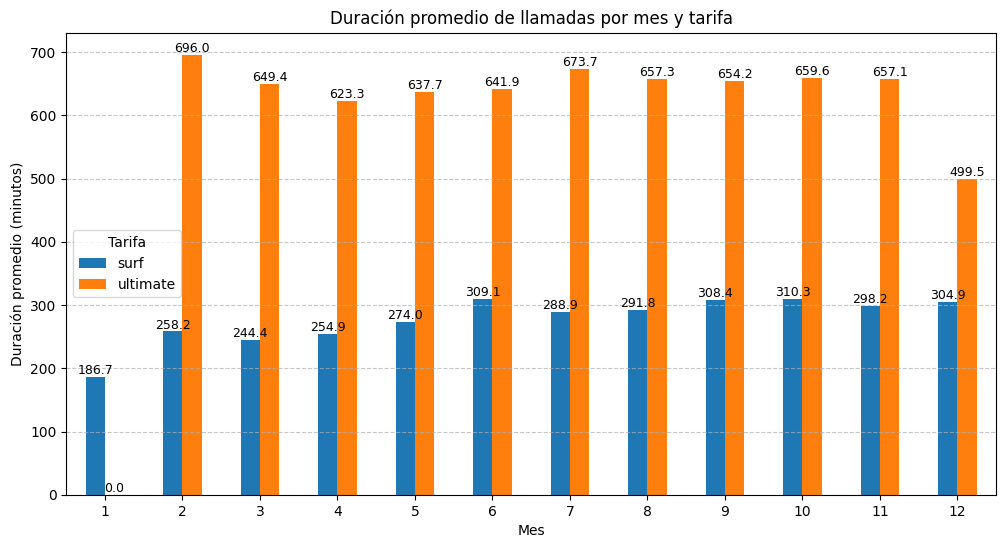

In [404]:
# Compara la duración promedio de llamadas por cada plan y por cada mes.
# Traza un gráfico de barras para visualizarla.
# Agrupar por mes y tarifa, calculando la duración promedio de llamadas
promedio_llamadas = df_sum.groupby(['mes', 'tarifa'])['total_minutos'].mean().reset_index()
promedio_pivot = promedio_llamadas.pivot(index='mes', columns='tarifa', values='total_minutos')


ax = promedio_pivot.plot(kind='bar', figsize=(12,6))
plt.title('Duración promedio de llamadas por mes y tarifa')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tarifa')


for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.show()


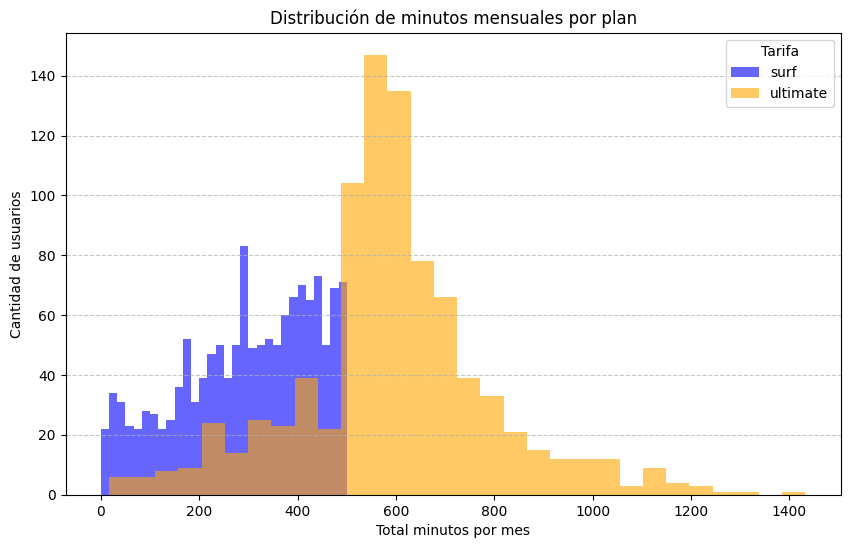

In [405]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan.
# Traza un histograma.

colores = {'surf': 'blue', 'ultimate': 'orange'}

plt.figure(figsize=(10,6))


for tarifa, color in colores.items():
    datos = df_sum[df_sum['tarifa'] == tarifa]['total_minutos']
    plt.hist(datos, bins=30, alpha=0.6, label=tarifa, color=color)

plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Total minutos por mes')
plt.ylabel('Cantidad de usuarios')
plt.legend(title='Tarifa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [406]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_llamadas = df_sum.groupby('tarifa')['total_minutos'].mean()
print("Media de duración mensual de llamadas por plan:")
print(media_llamadas)

varianza_llamadas = df_sum.groupby('tarifa')['total_minutos'].var()
print("\nVarianza de duración mensual de llamadas por plan:")
print(varianza_llamadas)


Media de duración mensual de llamadas por plan:
tarifa
surf        296.502165
ultimate    593.982798
Name: total_minutos, dtype: float64

Varianza de duración mensual de llamadas por plan:
tarifa
surf        18581.617685
ultimate    40551.874560
Name: total_minutos, dtype: float64


C:\Users\jonat\AppData\Local\Temp\ipykernel_14724\1992201849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tarifa', y='total_minutos', data=df_sum,


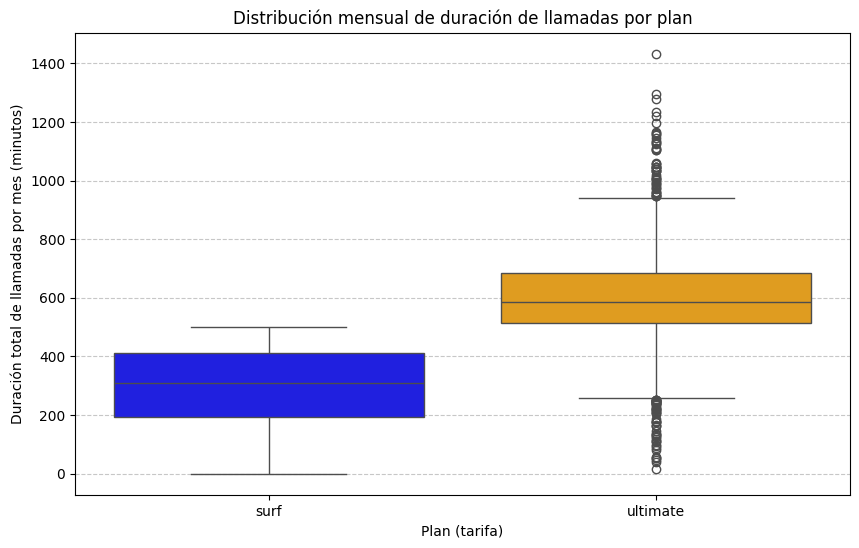

In [407]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10,6))


sns.boxplot(x='tarifa', y='total_minutos', data=df_sum,
            palette={'surf':'blue', 'ultimate':'orange'})

plt.title('Distribución mensual de duración de llamadas por plan')
plt.xlabel('Plan (tarifa)')
plt.ylabel('Duración total de llamadas por mes (minutos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Conclusiones: En la tarifa Surf, todos los ususariuos suelen comportarse de manera uniforme, lo que quiere decir que la tarifa y los rangos de surf, siempre tienen un rang de 200 a 400 con una media de 300 aprox, y un comportamiento mas uniforme, contrario a los ususario de tariifa ultimate, empezando por una media media cercaana a 600 minutos, y tiene una mayor dispersion, ahora aqui tambine observamos comportamientos atipicos, lo que quiere decir que si hay extremos, tanto conusmos altos como consumos bajos es decir un comportamiento no regular

### Mensajes

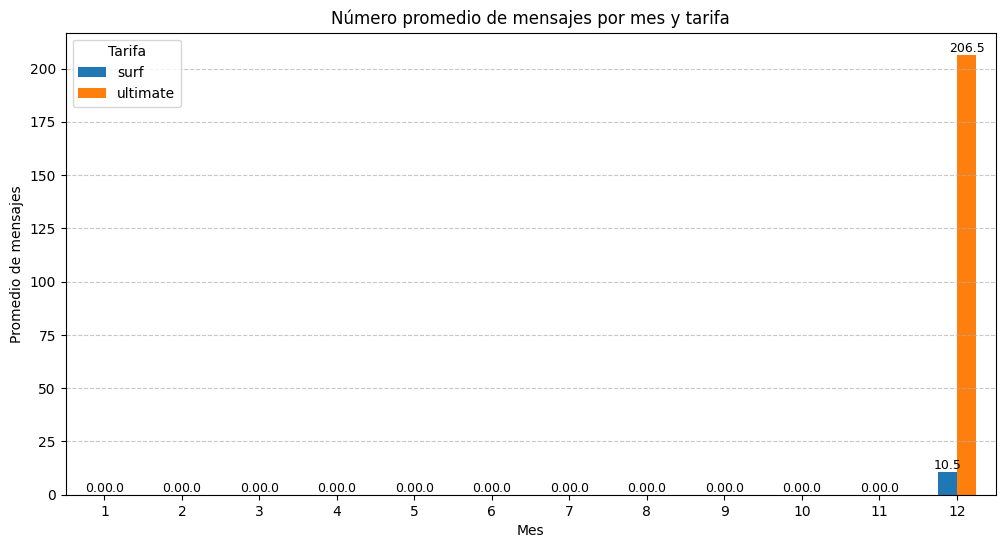

In [408]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Calcular el promedio de mensajes por mes y tarifa
promedio_mensajes = df_sum.groupby(['mes', 'tarifa'])['total_mensajes'].mean().reset_index()

promedio_pivot = promedio_mensajes.pivot(index='mes', columns='tarifa', values='total_mensajes')


ax = promedio_pivot.plot(kind='bar', figsize=(12,6))
plt.title('Número promedio de mensajes por mes y tarifa')
plt.xlabel('Mes')
plt.ylabel('Promedio de mensajes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tarifa')


for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=9)

plt.show()



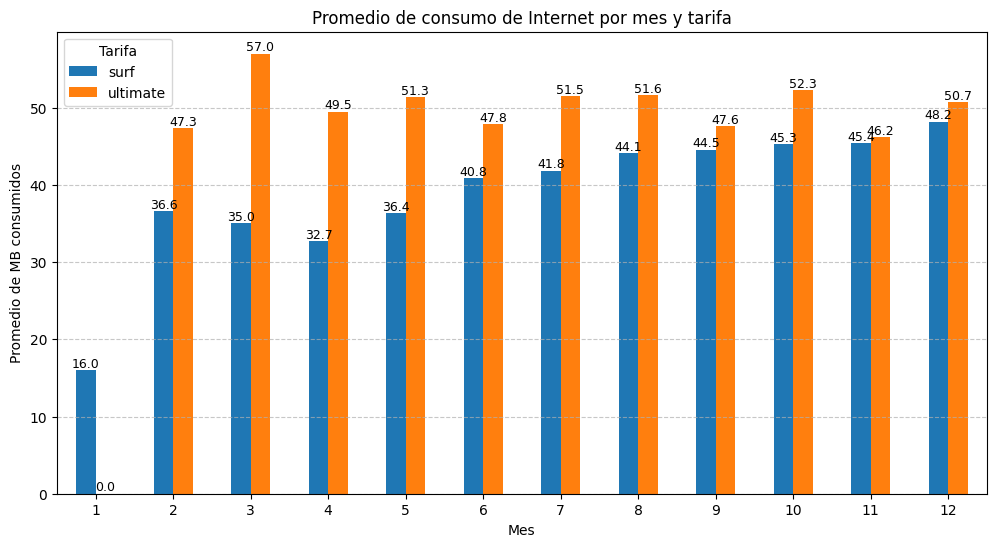

In [409]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Calcular el promedio de consumo de Internet por mes y tarifa
promedio_datos = df_sum.groupby(['mes', 'tarifa'])['total_megabytes'].mean().reset_index()


promedio_pivot = promedio_datos.pivot(index='mes', columns='tarifa', values='total_megabytes')


ax = promedio_pivot.plot(kind='bar', figsize=(12,6))
plt.title('Promedio de consumo de Internet por mes y tarifa')
plt.xlabel('Mes')
plt.ylabel('Promedio de MB consumidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tarifa')


for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=9)

plt.show()



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

No el comportamiento no varia respecto al plan, unicamente la cantidad de mensajes por lo que ets diseñado el pla, caso opuesto a internet

### Internet

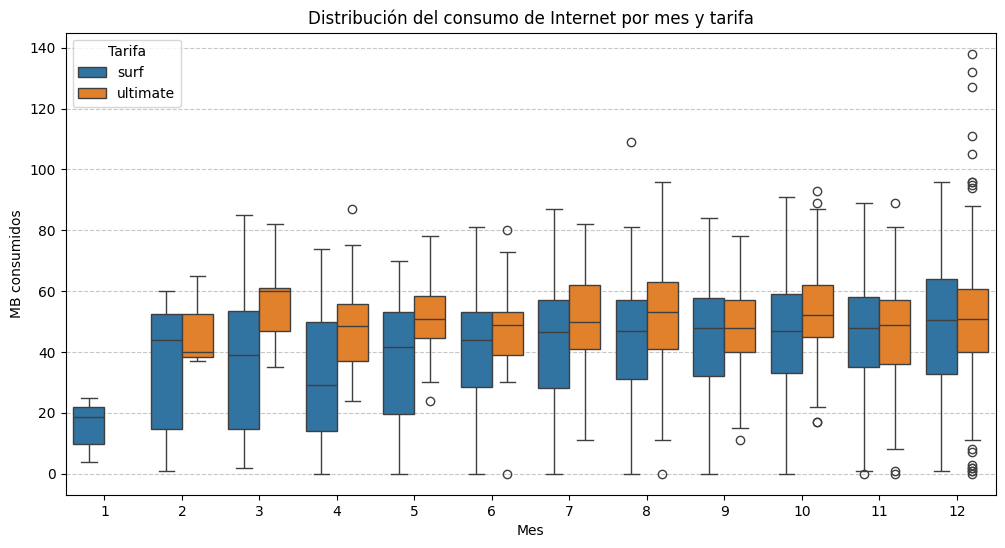

In [410]:
plt.figure(figsize=(12,6))
sns.boxplot(x='mes', y='total_megabytes', hue='tarifa', data=df_sum)
plt.title('Distribución del consumo de Internet por mes y tarifa')
plt.xlabel('Mes')
plt.ylabel('MB consumidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tarifa')
plt.show()


Los ususarios del plna surf tienen un rango de consumo mas amplio contra los usuarios de ultimate, en diferentes meses, aqui se logra observar como la tendencia a consumir cada mes mas en ciertos meses por los usuarios

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
La mayoría de los usuarios del plan ultimate consumen más datos en promedio, pero surf tiene más variabilidad y algunos usuarios con consumos extremadamente bajos o altos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [411]:
promedio_pago = df_sum.groupby('tarifa')['pago_mensual'].mean().reset_index()
promedio_pago


,tarifa,pago_mensual
0,surf,20.000000
1,ultimate,70.008624


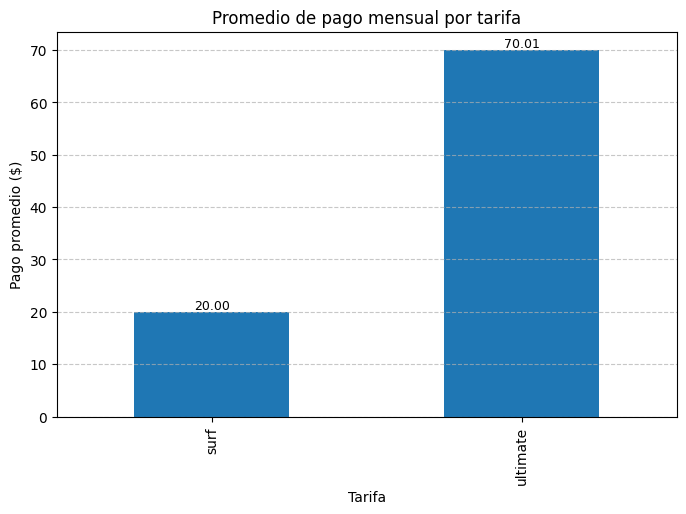

In [412]:
ax = promedio_pago.plot(x='tarifa', y='pago_mensual', kind='bar', figsize=(8,5), legend=False)
plt.title('Promedio de pago mensual por tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Pago promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=9)

plt.show()


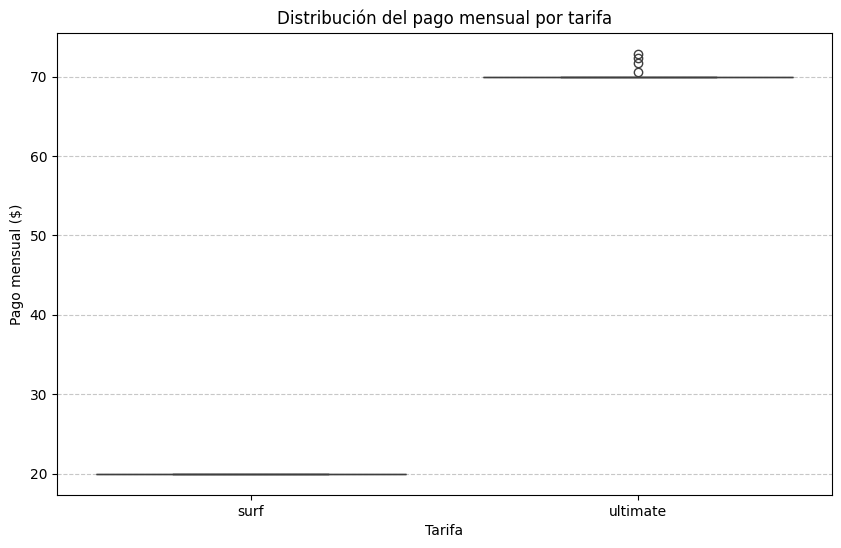

In [413]:
plt.figure(figsize=(10,6))
sns.boxplot(x='tarifa', y='pago_mensual', data=df_sum)
plt.title('Distribución del pago mensual por tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Pago mensual ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Por lo general, es raro el ususario al que se le cobre una tarifa o un extra por exceder los rangos de su plan, por lo que lo singresos son siempre fijos tanto 20 como 70

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
# El ingreso promedio de Ultimate = ingreso promedio de Surf
# El ingreso promedio de Ultimate ≠ ingreso promedio de Surf
surf = df_sum.loc[df_sum['tarifa'] == 'surf', 'pago_mensual']
ultimate = df_sum.loc[df_sum['tarifa'] == 'ultimate', 'pago_mensual']

print("Media Surf:", surf.mean())
print("Media Ultimate:", ultimate.mean())

alpha = 0.05  

results = st.ttest_ind(surf, ultimate, equal_var=False) 

print("valor-p:", results.pvalue/2) 


if (results.pvalue/2 < alpha) and (np.mean(ultimate) > np.mean(surf)):
    print("Rechazamos la hipótesis nula: los ingresos de Ultimate son mayores.")
else:
    print("No podemos rechazar la hipótesis nula.")



Media Surf: 20.0
Media Ultimate: 70.00862385321102
valor-p: 0.0
Rechazamos la hipótesis nula: los ingresos de Ultimate son mayores.


C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [418]:
# Prueba las hipótesis
t1['pago_mensual'] = t1['plan'].replace({'surf': 20, 'ultimate': 70})

ny_nj = t1.loc[t1['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'pago_mensual']
otros = t1.loc[t1['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'pago_mensual']


print("Media NY-NJ:", ny_nj.mean())
print("Media otras regiones:", otros.mean())


alpha = 0.05


results = st.ttest_ind(ny_nj, otros, equal_var=False)
print("valor-p:", results.pvalue)


if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente de diferencia.")



Media NY-NJ: 32.5
Media otras regiones: 36.785714285714285
valor-p: 0.11449891680287494
No podemos rechazar la hipótesis nula: no hay evidencia suficiente de diferencia.


C:\Users\jonat\AppData\Local\Temp\ipykernel_14724\3073381473.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  t1['pago_mensual'] = t1['plan'].replace({'surf': 20, 'ultimate': 70})


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Del total de usuario por numero de meses regsitrados podemos definir que hay 1386 registros de ususarios que pagan un plan con tarifa surf, con un costo promedio de 20 y hay 872 registros de ususarios que pagan un plan con tarifa ultimate con un costo de 70, doinde si se cobran excedentes y en esta tarifa hay ususarios que muestran comportamientos distintos, tando un alto consumo como un bajo consumo alejados de la media, caso contrario con los ususarios de la tarifa surf.

Sabemos igual que las ganancias en aspecto moentario son mayores los ingreso en la tarifa ultimate, contra las tarifa surf, por lo que es mas rentable la tarifa ultimate respecto a la tarifa surf, sin embargo hay mas usuarios que usan una tarifa surf que una tarifa ultimate

ahora podriamos hacer una analisis mas profundo donde podamos ver el comportamiento por ciudad y calclar tanto ingresos como el comportamiento de los usuarios.

Ahora la interpretacion de diagramas de caja asi como los posibles resultados de mayor evaluacion podemos deducir desde la media como los valores que representan los quartiles donde podemos ver diferentes comportamientos como valores atipicos donde hay un maxiumos y un minimo ene ste casod e consumo por plan, y caso contrario poder determianr el rango de comportamiento de un plan en concreto

para la prueba de hipotesis es fundamental poder entender el dataframe con el que vamos a trabajar y poder representarlo tanto en codigo como idea , poder determinar conq ue valores s etrabaja, tanto en las ciudades como con los dataframes creados y poder definir nuestro segmente de hipotesis

